<a href="https://colab.research.google.com/github/Suchitra-V31/Deep_Learning_Projects/blob/main/Brain_Tumor_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Brain Tumor Detection Using CNN.

In this dataset we are going to detect whether the person has affected with **brain tumor or not**.In this dataset we have taken **253** images which contains **155 yes** images and **98 no** images.We are going to train our model using **CNN**, a deep learning approach.

#Import the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
import tensorflow
from tensorflow import keras


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical


In [6]:
from sklearn.preprocessing import LabelEncoder

#Get the Data

In [7]:
data_path='/content/drive/MyDrive/Datasets/brain tumor dataset/brain_tumor_dataset'

In [8]:
data=[]
label=[]
for folder in os.listdir(data_path):
  for file in os.listdir(os.path.join(data_path,folder)):
    if file.endswith('jpg'):
      label.append(folder)
      img=cv2.imread(os.path.join(data_path,folder,file))
      img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img_resize=cv2.resize(img_rgb,(128,128))
      data.append(img_resize)
    else:
      continue


**Convert the images into array**

In [9]:
num_data=np.array(data)
num_label=np.array(label)

**Encode them using Label Encoder**

In [10]:
encoder=LabelEncoder()

In [11]:
y=encoder.fit_transform(num_label)

In [12]:
X=num_data/255
y=to_categorical(y,2)

#Split the data into train/test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [15]:
X_train.shape,X_test.shape

((119, 128, 128, 3), (52, 128, 128, 3))

In [16]:
y_train.shape,y_test.shape

((119, 2), (52, 2))

#Build Model

In [17]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0

#Compile Model

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train and Test

In [21]:
final_model=model.fit(X_train,y_train,epochs=32,validation_data=(X_test,y_test))

Epoch 1/32
4/4 [==============================] - 15s 4s/step - loss: 0.6590 - accuracy: 0.7311 - val_loss: 0.5507 - val_accuracy: 0.7692
Epoch 2/32
4/4 [==============================] - 16s 4s/step - loss: 0.6629 - accuracy: 0.6555 - val_loss: 0.5828 - val_accuracy: 0.7115
Epoch 3/32
4/4 [==============================] - 16s 4s/step - loss: 0.5707 - accuracy: 0.7479 - val_loss: 0.6084 - val_accuracy: 0.7308
Epoch 4/32
4/4 [==============================] - 15s 4s/step - loss: 0.5777 - accuracy: 0.7563 - val_loss: 0.5762 - val_accuracy: 0.7115
Epoch 5/32
4/4 [==============================] - 16s 4s/step - loss: 0.5350 - accuracy: 0.7731 - val_loss: 0.5179 - val_accuracy: 0.6538
Epoch 6/32
4/4 [==============================] - 16s 4s/step - loss: 0.5388 - accuracy: 0.7563 - val_loss: 0.5158 - val_accuracy: 0.7115
Epoch 7/32
4/4 [==============================] - 15s 4s/step - loss: 0.5252 - accuracy: 0.7479 - val_loss: 0.5206 - val_accuracy: 0.6923
Epoch 8/32
4/4 [==================

We could see that our model has performed with **98%** accuracy.

We could also see that in the 29th and 30th epoch our model has performed with 100% accuracy.

Let us visualize some of the features prediction and analyse how our model has predicted.

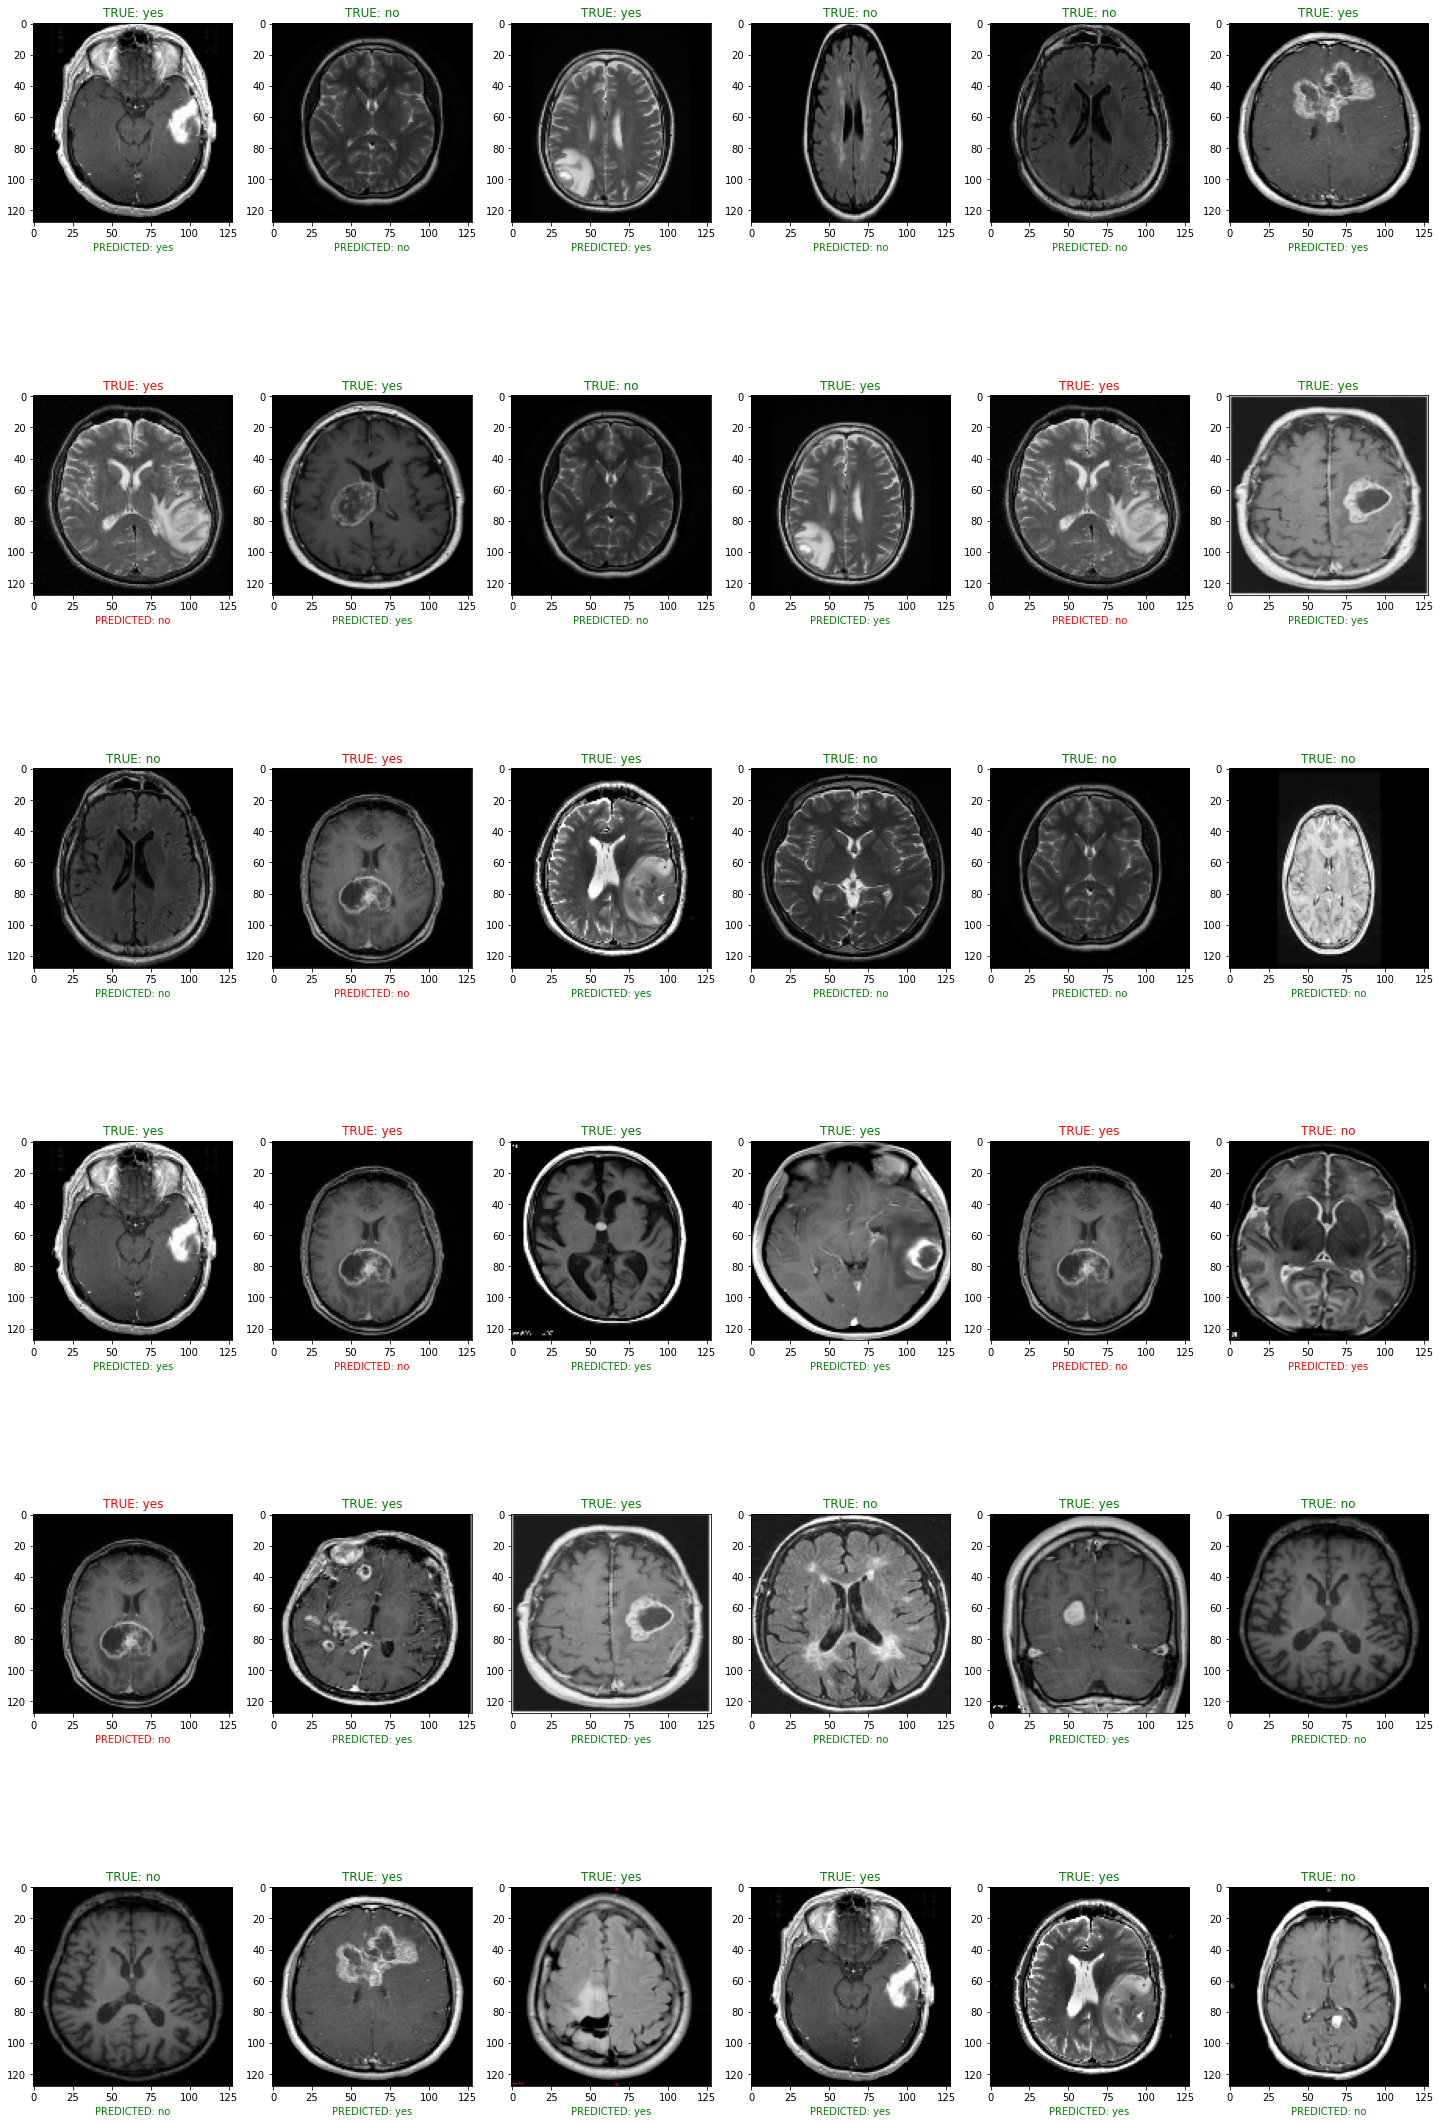

In [22]:
categories=np.sort(os.listdir(data_path))
fig,ax=plt.subplots(6,6,figsize=(25,40))
for i in range(6):
  for j in range(6):
    k=int(np.random.random_sample()*len(X_test))
    if (categories[np.argmax(y_test[k])]==categories[np.argmax(model.predict(X_test)[k])]):
      ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
      ax[i,j].imshow(np.array(X_test)[k].reshape(128, 128, 3), cmap='gray')
    else:
      ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
      ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
      ax[i,j].imshow(np.array(X_test)[k].reshape(128, 128, 3), cmap='gray')


#Save Model

In [23]:
model.save('braintumor.h5')